## <center> AMBER Tutorial </center>
# <center> Interactive data analysis with pytraj and Jupyter notebook </center>
### <center> By Hai Nguyen (BSD 2-clause) </center>

## What is Jupyter notebook?

Direct introduction and figure from [Jupyter notebook website](http://jupyter.org/):

"The Jupyter Notebook is a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning and much more."

<img src="images/jupyterpreview.png", width=500>



## What is pytraj?

**pytyraj** is a Python package binding to the popular **cpptraj** program. pytraj is written do extend the flexibility of cpptraj and to expose cpptraj's functionality to Python's ecossytem, such as numpy, pandas, matplotlib, ...

## What can you learn from this tutorial

- Use Jupyter notebook for interective data exploration

- Use pytraj to perform basis analysis such computing RMSD, center of mass distance, dihedral angles, ...

- Use matplotlib and pandas for analyzing output from pytraj


## Requirement

- [AmberTools >= 16](http://ambermd.org/#AmberTools)
- If you allow AMBER to install Python distribution from Miniconda, you have all needed packages for this tutorial.
- If not, you need to install (either using `pip` or `conda`)
    - matplotlib
    - jupyter notebook
- Install [pandas](http://pandas.pydata.org/): 
    ```bash
     amber.conda install pandas
    ```
- You know how to use Linux command line. If not, please check [basic AMBER tutorial](http://ambermd.org/tutorials/basic/tutorial0/)

## Download requried trajetories, topology

[trpzip2.gb.nc](http://ambermd.org/tutorials/analysis/tutorial1/trpzip2.gb.nc)

[trpzip2.ff10.mbondi2.parm7](http://ambermd.org/tutorials/analysis/tutorial1/trpzip2.ff10.mbondi.parm7)

[trpzip2.1LE1.1.rst7](http://ambermd.org/tutorials/analysis/tutorial1/trpzip2.1LE1.1.rst7)

Or open the website: http://ambermd.org/tutorials/analysis/tutorial1/ and manually download them.

### Start notebook

```bash
$ amber.jupyter notebook
(or jupyter notebook if you did not allow AMBER to install Miniconda)
```

- If you want to use the notebook remotely (run it in your remote cluster and view it in your desktop), please check [remote notebook tutorial](http://amber-md.github.io/pytraj/latest/tutorials/remote_jupyter_notebook)

- **Note**: This tutorial is written in the Jupyter notebook, so you can [download](./notebook.ipynb) and run it too.

- How to follow this tutorial? Copy and paste each command in this tutorial to the notebook, hit "**Shift-Enter**" to run and to create new Cell. Check **Tips** in the end of this tutorial for useful commands.

- You should expect to see

![](images/jupyter_open.png)

- Choose New --> Python 2 (or Python 3, depending on which version you're using)

- You should expect to see
![](images/jupyter_new.png)

Then you can copy/paste and run commands.

### Load trajectory to memory

In [1]:
from __future__ import print_function
import pytraj as pt

traj = pt.load('data/trpzip2.gb.nc', top='data/trpzip2.ff10.mbondi.parm7')

### Get some basic information about the trajectory

In [2]:
print(traj)

pytraj.Trajectory, 1201 frames: 
Size: 0.005906 (GB)
<Topology: 220 atoms, 13 residues, 1 mols, non-PBC>
           


### Calculating RMSD, using 1st frame as reference

In this case we are computing mass-weighted RMSD, using all non-hydrogen atoms in residues 1 to 13

In [3]:
data_rmsd_first = pt.rmsd(traj, ref=0, mask=":1-13&!@H*")

print(data_rmsd_first)

[  2.30050392e-07   7.92393865e-01   9.72257525e-01 ...,   2.51047183e+00
   2.44805673e+00   2.33894156e+00]


### Using matplotlib to plot

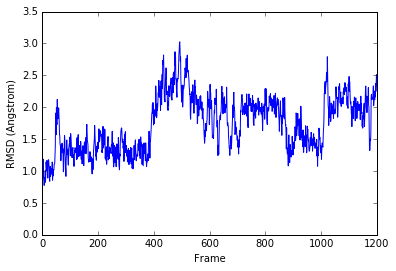

In [4]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.plot(data_rmsd_first)
plt.xlabel('Frame')
plt.ylabel('RMSD (Angstrom)')

### Loading reference structure

In this case, we are loading the NMR structure for trpzip2

In [5]:
# we can reuse loaded topology from `traj`
ref = pt.load('trpzip2.1LE1.1.rst7', top=traj.top)
print(ref)

ValueError: must provie a filename or list of filenames or file pattern

### Computing RMSD to a Reference

In [ ]:
data_rmsd_ref = pt.rmsd(traj, ref=ref, mask=":1-13&!@H*")
print(data_rmsd_ref)

## Plotting two RMSDs

We can plot rmsd to 1st frame (previously calculated) and rmsd to reference (NMR)

In [ ]:
plt.plot(data_rmsd_first, label='to first')
plt.plot(data_rmsd_ref, label='to NMR')
plt.xlabel('Frame')
plt.ylabel('RMSD (Angstrom)')
plt.legend()

### Computing dihedral angles

In this case, we are computing phi and psi angle for residues 2 to 12. We tell pytraj to convert raw data to pandas's DataFrame
to better visualization in notebook

In [ ]:
phipsi = pt.multidihedral(traj, resrange='1-12', dhtypes="phi psi", dtype='dataframe')

### Pretty display data

In this case, we only display a part of the data

In [ ]:
phipsi.head(5)

### Getting some basic info

In [ ]:
phipsi.describe()

### Plotting dihedral

In this case, we are plotting Psi dihedral for residue 4 (TRP)

In [ ]:
plt.plot(phipsi['psi_8'], '-bo', markersize=3, linewidth=0)
plt.xlabel('Frame')
plt.ylabel('Phi4')

# Get some information about the structure

In [ ]:
top = traj.top

for residue in top.residues:
    # Note: In python, 0-based index is used.
    # For example: SER0 should be first residue
    print(residue)

In [ ]:
traj.top.atomlist[:10]

## Tips

- Run bash command: Use !

In [ ]:
! echo Hello

- How to run this notebook?
    
    - Run all commands: **Cell -> Run All**
    - Run each Cell: **Ctrl-Enter**
    - Run each Cell and jump to next Cell: **Shift-Enter**
- How to save all commands to Python script: Choose **File -> Download as -> Python (.py)**
- How to save figures in this notebook: Right click and choose **Save image as** (or similiar command)
- More info? Choose **Help -> Keyboard Shortcuts**

## See also

If you would like to learn more about ``pytraj``, please see unofficial AMBER tutorials for pytraj in [pytraj website](http://amber-md.github.io/pytraj/latest/tutorials/index.html)